In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
df = pd.read_csv('labels.csv')
df.head()

,filepath,xmin,xmax,ymin,ymax
0,./data\c1.xml,183,681,268,410
1,./data\c10.xml,290,925,373,496
2,./data\c11.xml,740,1121,536,705
3,./data\c12.xml,237,398,232,277
4,./data\c13.xml,197,311,105,135


In [3]:
import xml.etree.ElementTree as xet

In [4]:
filename = df['filepath'][0]
filename

'./data\\c1.xml'

In [5]:
def getFilename(filename):
    filename_image = xet.parse(filename).getroot().find('filename').text
    filepath = os.path.join('./data', filename_image)
    return filepath

In [6]:
getFilename(filename)

'./data\\c1.jpg'

In [7]:
images_path = list(df['filepath'].apply(getFilename))
images_path

['./data\\c1.jpg',
 './data\\c10.jpg',
 './data\\c11.jpg',
 './data\\c12.jpg',
 './data\\c13.jpg',
 './data\\c14.jpg',
 './data\\c15.jpg',
 './data\\c16.jpg',
 './data\\c17.jpg',
 './data\\c18.jpg',
 './data\\c19.jpg',
 './data\\c2.jpg',
 './data\\c20.jpg',
 './data\\c21.jpg',
 './data\\c22.jpg',
 './data\\c23.jpg',
 './data\\c24.jpg',
 './data\\c25.jpg',
 './data\\c3.jpg',
 './data\\c4.jpg',
 './data\\c5.jpg',
 './data\\c6.jpg',
 './data\\c7.jpg',
 './data\\c8.jpg',
 './data\\c9.jpg']

### Verifying images and outputs

In [8]:
file_path = images_path[0]
img = cv2.imread(file_path, )
cv2.imshow('example', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
# coordinates of bounding box for first file: 183	681	268	410
cv2.rectangle(img, (183, 268), (681, 410), (255, 0, 0), 3)
cv2.imshow('example', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Data Preprocessing

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [12]:
labels = df.iloc[:, 1:].values
labels

array([[ 183,  681,  268,  410],
       [ 290,  925,  373,  496],
       [ 740, 1121,  536,  705],
       [ 237,  398,  232,  277],
       [ 197,  311,  105,  135],
       [ 113,  329,   96,  179],
       [ 286,  513,  355,  411],
       [ 246,  407,  287,  322],
       [ 381,  585,  387,  470],
       [ 112,  268,  135,  178],
       [ 175,  442,  225,  284],
       [ 253,  906,  453,  761],
       [ 517,  903,  700,  823],
       [ 445, 1468,  349,  724],
       [ 125,  352,  265,  335],
       [ 608,  985,  408,  575],
       [ 241,  394,  228,  275],
       [ 722, 1022,  561,  659],
       [ 200,  376,  162,  219],
       [ 748, 1428,  577,  771],
       [ 461,  788,  210,  298],
       [ 198,  698,  150,  350],
       [ 428,  735,  316,  401],
       [ 378,  680,  422,  536],
       [ 452,  704,  513,  579]], dtype=int64)

In [18]:
data = []
output = []

for index in range(len(images_path)):
    image = images_path[index]
    img_arr = cv2.imread(image)
    h, w, d = img_arr.shape

    #preprocessing
    load_image = load_img(image, target_size=(224, 224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr / 255.0

    #normalization
    xmin, xmax, ymin, ymax = labels[index]
    nxmin, nxmax = xmin / w, xmax / w
    nymin, nymax = ymin / h, ymax / h
    label_norm = (nxmin, nxmax, nymin, nymax)
    
    data.append(norm_load_image_arr)
    output.append(label_norm)

In [19]:
data

[array([[[0.62352943, 0.44705883, 0.5294118 ],
         [0.627451  , 0.4392157 , 0.5254902 ],
         [0.627451  , 0.4509804 , 0.5294118 ],
         ...,
         [0.6745098 , 0.48235294, 0.5647059 ],
         [0.6627451 , 0.47058824, 0.5529412 ],
         [0.65882355, 0.46666667, 0.5411765 ]],
 
        [[0.627451  , 0.4509804 , 0.53333336],
         [0.62352943, 0.44705883, 0.5254902 ],
         [0.62352943, 0.44705883, 0.5254902 ],
         ...,
         [0.6509804 , 0.46666667, 0.5372549 ],
         [0.65882355, 0.46666667, 0.54901963],
         [0.654902  , 0.4627451 , 0.54509807]],
 
        [[0.62352943, 0.43137255, 0.5058824 ],
         [0.6313726 , 0.4392157 , 0.5137255 ],
         [0.6313726 , 0.4392157 , 0.5254902 ],
         ...,
         [0.67058825, 0.47058824, 0.54509807],
         [0.6666667 , 0.4627451 , 0.54901963],
         [0.6784314 , 0.4745098 , 0.56078434]],
 
        ...,
 
        [[0.23921569, 0.04313726, 0.00784314],
         [0.23921569, 0.04313726, 0.     

In [20]:
output

[(0.2103448275862069,
  0.7827586206896552,
  0.47017543859649125,
  0.7192982456140351),
 (0.2265625, 0.72265625, 0.5180555555555556, 0.6888888888888889),
 (0.3854166666666667,
  0.5838541666666667,
  0.4962962962962963,
  0.6527777777777778),
 (0.3767885532591415,
  0.6327503974562798,
  0.6338797814207651,
  0.7568306010928961),
 (0.394, 0.622, 0.4525862068965517, 0.5818965517241379),
 (0.23839662447257384,
  0.6940928270042194,
  0.2704225352112676,
  0.504225352112676),
 (0.3695090439276486,
  0.6627906976744186,
  0.5529595015576324,
  0.6401869158878505),
 (0.384375, 0.6359375, 0.6768867924528302, 0.7594339622641509),
 (0.396875, 0.609375, 0.75, 0.9108527131782945),
 (0.28, 0.67, 0.45, 0.5933333333333334),
 (0.2916666666666667,
  0.7366666666666667,
  0.665680473372781,
  0.8402366863905325),
 (0.19765625, 0.7078125, 0.5310668229777257, 0.8921453692848769),
 (0.36459802538787023,
  0.6368124118476728,
  0.6542056074766355,
  0.7691588785046729),
 (0.2847088931541907,
  0.9392194

In [21]:
X = np.array(data, dtype = np.float32)
y = np.array(output, dtype = np.float32)

In [22]:
X.shape

(25, 224, 224, 3)

In [23]:
y.shape

(25, 4)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=420)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 224, 224, 3), (5, 224, 224, 3), (20, 4), (5, 4))

### DL Models

In [26]:
from tensorflow.keras.applications import MobileNetV2, InceptionV3, InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.models import Model
import tensorflow as tf

In [28]:
inception_resnet = InceptionResNetV2(weights='imagenet', include_top=False,
                                    input_tensor=Input(shape=(224, 224, 3)))
inception_resnet.trainable = False


headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(256, activation='relu')(headmodel)
headmodel = Dense(128, activation='relu')(headmodel)
headmodel = Dense(4, activation='sigmoid')(headmodel)

model = Model(inputs=inception_resnet.input, outputs=headmodel)

In [36]:
model.compile(loss='mse',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                             

 batch_normalization_208 (Batch  (None, 25, 25, 96)  288         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 25, 25, 64)  192         ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_213 (Batch  (None, 25, 25, 96)  288         ['conv2d_213[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_214 (Batch  (None, 25, 25, 64)  192         ['conv2d_214[0][0]']             
 Normaliza

 activation_224 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_224[0][0]']
                                                                                                  
 conv2d_222 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_1_ac[0][0]']           
                                                                                                  
 conv2d_225 (Conv2D)            (None, 25, 25, 48)   13824       ['activation_224[0][0]']         
                                                                                                  
 batch_normalization_222 (Batch  (None, 25, 25, 32)  96          ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_225 (Batch  (None, 25, 25, 48)  144         ['conv2d_225[0][0]']             
 Normaliza

                                                                                                  
 activation_227 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_227[0][0]']
                                                                                                  
 activation_229 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_229[0][0]']
                                                                                                  
 activation_232 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_232[0][0]']
                                                                                                  
 block35_3_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_227[0][0]',         
                                                                  'activation_229[0][0]',         
                                                                  'activation_232[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_243 (Batch  (None, 25, 25, 48)  144         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_240 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_240[0][0]']
                                                                                                  
 activation_243 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_4_ac[0][0]']           
          

 block35_6_mixed (Concatenate)  (None, 25, 25, 128)  0           ['activation_245[0][0]',         
                                                                  'activation_247[0][0]',         
                                                                  'activation_250[0][0]']         
                                                                                                  
 block35_6_conv (Conv2D)        (None, 25, 25, 320)  41280       ['block35_6_mixed[0][0]']        
                                                                                                  
 block35_6 (Lambda)             (None, 25, 25, 320)  0           ['block35_5_ac[0][0]',           
                                                                  'block35_6_conv[0][0]']         
                                                                                                  
 block35_6_ac (Activation)      (None, 25, 25, 320)  0           ['block35_6[0][0]']              
          

 activation_261 (Activation)    (None, 25, 25, 48)   0           ['batch_normalization_261[0][0]']
                                                                                                  
 conv2d_257 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_7_ac[0][0]']           
                                                                                                  
 conv2d_259 (Conv2D)            (None, 25, 25, 32)   9216        ['activation_258[0][0]']         
                                                                                                  
 conv2d_262 (Conv2D)            (None, 25, 25, 64)   27648       ['activation_261[0][0]']         
                                                                                                  
 batch_normalization_257 (Batch  (None, 25, 25, 32)  96          ['conv2d_257[0][0]']             
 Normalization)                                                                                   
          

                                                                  'block35_9_conv[0][0]']         
                                                                                                  
 block35_9_ac (Activation)      (None, 25, 25, 320)  0           ['block35_9[0][0]']              
                                                                                                  
 conv2d_272 (Conv2D)            (None, 25, 25, 32)   10240       ['block35_9_ac[0][0]']           
                                                                                                  
 batch_normalization_272 (Batch  (None, 25, 25, 32)  96          ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_272 (Activation)    (None, 25, 25, 32)   0           ['batch_normalization_272[0][0]']
          

 activation_278 (Activation)    (None, 12, 12, 384)  0           ['batch_normalization_278[0][0]']
                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 320)  0          ['block35_10_ac[0][0]']          
                                                                                                  
 mixed_6a (Concatenate)         (None, 12, 12, 1088  0           ['activation_275[0][0]',         
                                )                                 'activation_278[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_280 (Conv2D)            (None, 12, 12, 128)  139264      ['mixed_6a[0][0]']               
                                                                                                  
 batch_nor

                                )                                 'block17_2_conv[0][0]']         
                                                                                                  
 block17_2_ac (Activation)      (None, 12, 12, 1088  0           ['block17_2[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_288 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_2_ac[0][0]']           
                                                                                                  
 batch_normalization_288 (Batch  (None, 12, 12, 128)  384        ['conv2d_288[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv2d_296 (Conv2D)            (None, 12, 12, 128)  139264      ['block17_4_ac[0][0]']           
                                                                                                  
 batch_normalization_296 (Batch  (None, 12, 12, 128)  384        ['conv2d_296[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_296 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_296[0][0]']
                                                                                                  
 conv2d_297 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_296[0][0]']         
          

                                                                                                  
 batch_normalization_304 (Batch  (None, 12, 12, 128)  384        ['conv2d_304[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_304 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_304[0][0]']
                                                                                                  
 conv2d_305 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_304[0][0]']         
                                                                                                  
 batch_normalization_305 (Batch  (None, 12, 12, 160)  480        ['conv2d_305[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 activation_312 (Activation)    (None, 12, 12, 128)  0           ['batch_normalization_312[0][0]']
                                                                                                  
 conv2d_313 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_312[0][0]']         
                                                                                                  
 batch_normalization_313 (Batch  (None, 12, 12, 160)  480        ['conv2d_313[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_313 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_313[0][0]']
                                                                                                  
 conv2d_31

 conv2d_321 (Conv2D)            (None, 12, 12, 160)  143360      ['activation_320[0][0]']         
                                                                                                  
 batch_normalization_321 (Batch  (None, 12, 12, 160)  480        ['conv2d_321[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_321 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_321[0][0]']
                                                                                                  
 conv2d_319 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_10_ac[0][0]']          
                                                                                                  
 conv2d_322 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_321[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_329 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_329[0][0]']
                                                                                                  
 conv2d_327 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_12_ac[0][0]']          
                                                                                                  
 conv2d_330 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_329[0][0]']         
                                                                                                  
 batch_normalization_327 (Batch  (None, 12, 12, 192)  576        ['conv2d_327[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_335 (Conv2D)            (None, 12, 12, 192)  208896      ['block17_14_ac[0][0]']          
                                                                                                  
 conv2d_338 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_337[0][0]']         
                                                                                                  
 batch_normalization_335 (Batch  (None, 12, 12, 192)  576        ['conv2d_335[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_338 (Batch  (None, 12, 12, 192)  576        ['conv2d_338[0][0]']             
 Normalization)                                                                                   
          

 conv2d_346 (Conv2D)            (None, 12, 12, 192)  215040      ['activation_345[0][0]']         
                                                                                                  
 batch_normalization_343 (Batch  (None, 12, 12, 192)  576        ['conv2d_343[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_346 (Batch  (None, 12, 12, 192)  576        ['conv2d_346[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_343 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_343[0][0]']
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_354 (Batch  (None, 12, 12, 192)  576        ['conv2d_354[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_351 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_351[0][0]']
                                                                                                  
 activation_354 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_354[0][0]']
                                                                                                  
 block17_19_mixed (Concatenate)  (None, 12, 12, 384)  0          ['activation_351[0][0]',         
          

 activation_359 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_359[0][0]']
                                                                                                  
 activation_361 (Activation)    (None, 12, 12, 256)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 12, 12, 288)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 conv2d_360 (Conv2D)            (None, 5, 5, 384)    884736      ['activation_359[0][0]']         
                                                                                                  
 conv2d_362 (Conv2D)            (None, 5, 5, 288)    663552      ['activation_361[0][0]']         
                                                                                                  
 conv2d_36

                                                                                                  
 activation_372 (Activation)    (None, 5, 5, 224)    0           ['batch_normalization_372[0][0]']
                                                                                                  
 conv2d_370 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_1_ac[0][0]']            
                                                                                                  
 conv2d_373 (Conv2D)            (None, 5, 5, 256)    172032      ['activation_372[0][0]']         
                                                                                                  
 batch_normalization_370 (Batch  (None, 5, 5, 192)   576         ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 batch_normalization_378 (Batch  (None, 5, 5, 192)   576         ['conv2d_378[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_381 (Batch  (None, 5, 5, 256)   768         ['conv2d_381[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_378 (Activation)    (None, 5, 5, 192)    0           ['batch_normalization_378[0][0]']
                                                                                                  
 activation_381 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_381[0][0]']
                                                                                                  
 block8_4_

                                                                                                  
 activation_389 (Activation)    (None, 5, 5, 256)    0           ['batch_normalization_389[0][0]']
                                                                                                  
 block8_6_mixed (Concatenate)   (None, 5, 5, 448)    0           ['activation_386[0][0]',         
                                                                  'activation_389[0][0]']         
                                                                                                  
 block8_6_conv (Conv2D)         (None, 5, 5, 2080)   933920      ['block8_6_mixed[0][0]']         
                                                                                                  
 block8_6 (Lambda)              (None, 5, 5, 2080)   0           ['block8_5_ac[0][0]',            
                                                                  'block8_6_conv[0][0]']          
          

                                                                                                  
 block8_8 (Lambda)              (None, 5, 5, 2080)   0           ['block8_7_ac[0][0]',            
                                                                  'block8_8_conv[0][0]']          
                                                                                                  
 block8_8_ac (Activation)       (None, 5, 5, 2080)   0           ['block8_8[0][0]']               
                                                                                                  
 conv2d_399 (Conv2D)            (None, 5, 5, 192)    399360      ['block8_8_ac[0][0]']            
                                                                                                  
 batch_normalization_399 (Batch  (None, 5, 5, 192)   576         ['conv2d_399[0][0]']             
 Normalization)                                                                                   
          

 )                                                                                                
                                                                                                  
 conv_7b_ac (Activation)        (None, 5, 5, 1536)   0           ['conv_7b_bn[0][0]']             
                                                                                                  
 flatten_1 (Flatten)            (None, 38400)        0           ['conv_7b_ac[0][0]']             
                                                                                                  
 dense_3 (Dense)                (None, 256)          9830656     ['flatten_1[0][0]']              
                                                                                                  
 dense_4 (Dense)                (None, 128)          32896       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (

### Model Training

In [37]:
from tensorflow.keras.callbacks import TensorBoard
tfb = TensorBoard('object_detection')
history = model.fit(x=X_train, y=y_train, batch_size=8, epochs=100,
                   validation_data=(X_test, y_test), callbacks=[tfb])

Epoch 1/100
3/3 [==============================] - 10s 2s/step - loss: 0.0629 - accuracy: 0.6000 - val_loss: 0.0505 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 2s 604ms/step - loss: 0.0602 - accuracy: 0.7500 - val_loss: 0.0540 - val_accuracy: 0.8000
Epoch 3/100
3/3 [==============================] - 2s 592ms/step - loss: 0.0497 - accuracy: 0.8000 - val_loss: 0.0380 - val_accuracy: 0.8000
Epoch 4/100
3/3 [==============================] - 2s 576ms/step - loss: 0.0573 - accuracy: 0.6500 - val_loss: 0.0365 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 2s 597ms/step - loss: 0.0441 - accuracy: 0.6500 - val_loss: 0.0474 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 2s 637ms/step - loss: 0.0439 - accuracy: 0.9000 - val_loss: 0.0372 - val_accuracy: 0.8000
Epoch 7/100
3/3 [==============================] - 2s 674ms/step - loss: 0.0409 - accuracy: 0.8000 - val_loss: 0.0399 - val_accuracy: 1.0000
Epoch 8/100
3/3

Epoch 59/100
3/3 [==============================] - 2s 668ms/step - loss: 0.0077 - accuracy: 0.9000 - val_loss: 0.0086 - val_accuracy: 0.6000
Epoch 60/100
3/3 [==============================] - 2s 692ms/step - loss: 0.0085 - accuracy: 0.9000 - val_loss: 0.0074 - val_accuracy: 0.6000
Epoch 61/100
3/3 [==============================] - 2s 749ms/step - loss: 0.0082 - accuracy: 0.7500 - val_loss: 0.0075 - val_accuracy: 0.6000
Epoch 62/100
3/3 [==============================] - 2s 663ms/step - loss: 0.0078 - accuracy: 0.8000 - val_loss: 0.0081 - val_accuracy: 0.6000
Epoch 63/100
3/3 [==============================] - 2s 658ms/step - loss: 0.0093 - accuracy: 0.8000 - val_loss: 0.0087 - val_accuracy: 0.6000
Epoch 64/100
3/3 [==============================] - 2s 660ms/step - loss: 0.0083 - accuracy: 0.8500 - val_loss: 0.0086 - val_accuracy: 0.6000
Epoch 65/100
3/3 [==============================] - 2s 676ms/step - loss: 0.0076 - accuracy: 0.9000 - val_loss: 0.0065 - val_accuracy: 0.6000
Epoch 

In [38]:
history = model.fit(x=X_train, y=y_train, batch_size=8, epochs=200,
                    validation_data=(X_test, y_test), callbacks=[tfb], initial_epoch=100)            

Epoch 101/200
3/3 [==============================] - 2s 663ms/step - loss: 0.0029 - accuracy: 0.9500 - val_loss: 0.0072 - val_accuracy: 0.6000
Epoch 102/200
3/3 [==============================] - 2s 705ms/step - loss: 0.0021 - accuracy: 0.9000 - val_loss: 0.0062 - val_accuracy: 0.6000
Epoch 103/200
3/3 [==============================] - 2s 674ms/step - loss: 0.0023 - accuracy: 0.9500 - val_loss: 0.0058 - val_accuracy: 0.6000
Epoch 104/200
3/3 [==============================] - 2s 693ms/step - loss: 0.0025 - accuracy: 0.9500 - val_loss: 0.0078 - val_accuracy: 0.6000
Epoch 105/200
3/3 [==============================] - 2s 657ms/step - loss: 0.0027 - accuracy: 0.9500 - val_loss: 0.0067 - val_accuracy: 0.6000
Epoch 106/200
3/3 [==============================] - 2s 697ms/step - loss: 0.0024 - accuracy: 0.9000 - val_loss: 0.0058 - val_accuracy: 0.6000
Epoch 107/200
3/3 [==============================] - 2s 693ms/step - loss: 0.0027 - accuracy: 0.9500 - val_loss: 0.0075 - val_accuracy: 0.6000

3/3 [==============================] - 2s 669ms/step - loss: 4.5228e-04 - accuracy: 0.9000 - val_loss: 0.0048 - val_accuracy: 0.6000
Epoch 159/200
3/3 [==============================] - 2s 668ms/step - loss: 4.7533e-04 - accuracy: 0.9500 - val_loss: 0.0060 - val_accuracy: 0.6000
Epoch 160/200
3/3 [==============================] - 2s 668ms/step - loss: 7.1495e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.6000
Epoch 161/200
3/3 [==============================] - 2s 669ms/step - loss: 3.7768e-04 - accuracy: 0.9000 - val_loss: 0.0048 - val_accuracy: 0.6000
Epoch 162/200
3/3 [==============================] - 2s 664ms/step - loss: 2.9234e-04 - accuracy: 0.9000 - val_loss: 0.0058 - val_accuracy: 0.6000
Epoch 163/200
3/3 [==============================] - 2s 680ms/step - loss: 4.3761e-04 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.6000
Epoch 164/200
3/3 [==============================] - 2s 691ms/step - loss: 2.1882e-04 - accuracy: 1.0000 - val_loss: 0.0053 - val_ac

In [39]:
model.save('./model/resnetV2.h5')

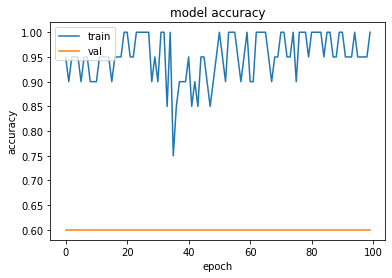

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()